In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import tensorflow 
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SpatialDropout1D
np.random.seed(2020)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
test_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

In [ ]:
train_df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [ ]:
labels_df=train_df.drop(['ID','TITLE','ABSTRACT'],axis=1)
y=labels_df.values

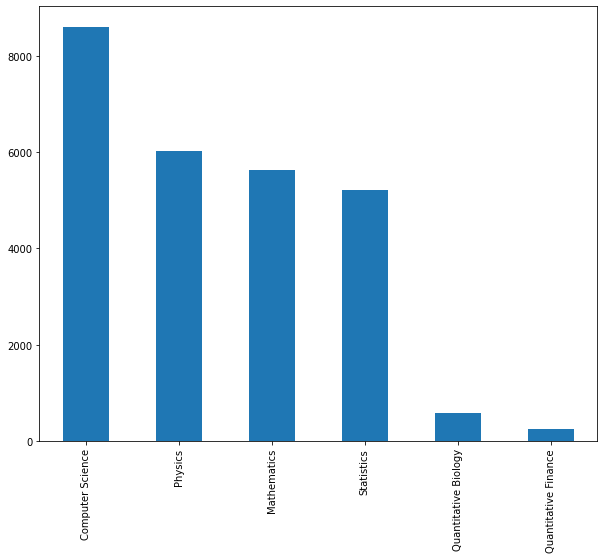

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
 
labels_df.sum(axis=0).plot.bar()

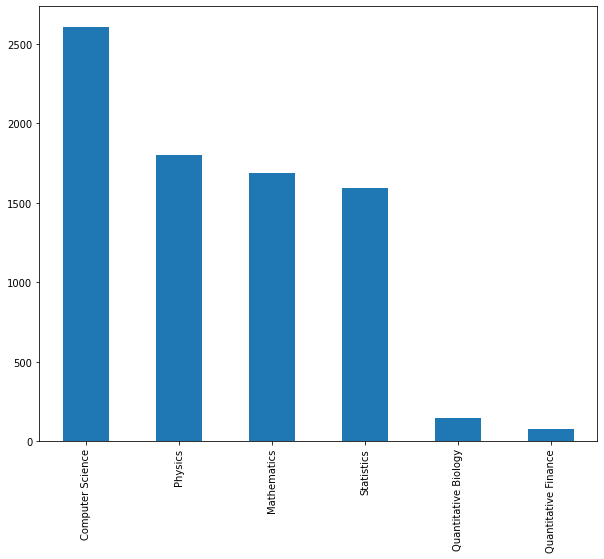

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

labels_df[14680:].sum(axis=0).plot.bar()

In [ ]:
total_df=pd.concat([train_df[['ID','TITLE','ABSTRACT']],test_df],axis=0,ignore_index=True)
total_df['LEN_TITLE']=total_df['TITLE'].apply(lambda x:len(x))
total_df['LEN_ABSTRACT']=total_df['ABSTRACT'].apply(lambda x:len(x))

In [ ]:
total_df.head()

,ID,TITLE,ABSTRACT,LEN_TITLE,LEN_ABSTRACT
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,43,1912
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,34,513
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,70,668
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,91,783
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,142,860


In [ ]:
total_df['ABSTRACT'][0]

"  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used with different binary classifiers in a diagn

In [ ]:
corpuses[0]

'reconstruct subject specific effect maps predictive model allow subject specific inference analyz disease relat alterat neuroimag data given subject data inference made two level global identifiy condit presence subject local detect condit effect individual measurement extract subject data global inference widely used local inference used form subject specific effect map rarely used exist model often yield noisy detect compos dispers isolat island article propose reconstruct method named rsm improve subject specific detect predictive model approach particular binary classifier rsm specifically aim reduce noise due sampl error associat using finite sample example train classifier propos method wrapper type algorithm used different binary classifier diagnostic manner without informat condit presence reconstruct posed maximum posteriori problem prior model whose parameter estimat train data classifier specific fash experimental evaluat perform synthetically generat data data alzheimers d

In [ ]:
h='execution'

In [ ]:
h[-2:]

'on'

In [ ]:
def text_processor(text):

    new_text=text.replace('\n',' ')
    new_text1=new_text.replace('-',' ')
    new_text2=new_text1.replace('i.e.','')
    t=[]
    for i in new_text2:
        if i not in string.punctuation:
            t.append(i)
        else:
            pass
    u=''.join(t)
    v=u.split()
    w=[]
    for j in v:
        if j.lower() not in stopwords.words('english'):
            w.append(j)
        else:
            pass
    lemma=WordNetLemmatizer()
    x=[]
    for k in w:
      x.append(lemma.lemmatize(k))
    lower_text=[]
    for l in x:
      lower_text.append(l.lower())
    rem_text=[] #'ion','ing','es','ed','ly'
    for m in lower_text:
      if len(m)>5:
        if m[-3:]=='ion' or m[-3:]=='ing':
          rem_text.append(m[0:(len(m)-3)])
        elif m[-2:]=='ed' or m[-2:]=='es' or m[-2:]=='ly':
          rem_text.append(m[0:(len(m)-2)])
        else:
          rem_text.append(m)
      else:
        rem_text.append(m)

    edited_str=' '.join(rem_text)
    return edited_str

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
Cleaned_title=total_df['TITLE'].apply(text_processor)

In [ ]:
Cleaned_abstract=total_df['ABSTRACT'].apply(text_processor)

In [ ]:
Cleaned_title=list(Cleaned_title)
Cleaned_abstract=list(Cleaned_abstract)

In [ ]:
corpuses=[]
for i in list(range(0,29961)):
  corpuses.append(Cleaned_title[i]+' '+Cleaned_abstract[i])

# TF-IDF

In [ ]:
tfidfvec = TfidfVectorizer(analyzer='word', ngram_range = (1,3), min_df = 30)

In [ ]:
tfidfdata = tfidfvec.fit_transform(Cleaned_abstract)

In [ ]:
tfidfdata.shape

(29961, 10077)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [ ]:
train_sparse=tfidfdata[0:20972]
train_dense=train_sparse.todense()
test_sparse=tfidfdata[20972:]
test_dense=test_sparse.todense()

In [ ]:
train_dense.shape

(20972, 10759)

In [ ]:
X_train_df =pd.DataFrame(data=train_dense,columns=['col'+str(i) for i in list(range(1,10760))])
###################################################################################################################
X_test_df =pd.DataFrame(data=test_dense,columns=['col'+str(i) for i in list(range(1,10760))])

In [ ]:
X_train_df['Len_title']=total_df['LEN_TITLE'][0:20972]
X_train_df['Len_abstract']=total_df['LEN_ABSTRACT'][0:20972]
X_test_df['Len_title']=total_df['LEN_TITLE'][20972:]
X_test_df['Len_abstract']=total_df['LEN_ABSTRACT'][20972:]

In [ ]:
X_train_df.shape, X_test_df.shape

((20972, 10761), (8989, 10761))

In [ ]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [ ]:
X_train_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,...,col10722,col10723,col10724,col10725,col10726,col10727,col10728,col10729,col10730,col10731,col10732,col10733,col10734,col10735,col10736,col10737,col10738,col10739,col10740,col10741,col10742,col10743,col10744,col10745,col10746,col10747,col10748,col10749,col10750,col10751,col10752,col10753,col10754,col10755,col10756,col10757,col10758,col10759,Len_title,Len_abstract
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055843,0.0,0.0,0.052578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43,1912
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34,513
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,668
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91,783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142,860


# Keras Embedding and LSTM

In [ ]:
voc_size=10000

In [ ]:
# onehot representation.
one_hot_representation=[one_hot(words,voc_size) for words in Cleaned_abstract]

In [ ]:
#one_hot_representation[0]

In [ ]:
# Embedding 
sentence_length=90

In [ ]:
embedded_docs=pad_sequences(one_hot_representation,padding='pre',maxlen=sentence_length)

In [ ]:
embedded_docs.shape

(29961, 90)

In [ ]:
X_train=embedded_docs[0:20972]
X_test=embedded_docs[20972:]

In [ ]:
# Creating_model
embedding_vector_features=70
model=tensorflow.keras.models.Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sentence_length))
 
model.add(LSTM(100))
 
model.add(Dense(units=6,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.fit(x=np.array(X_train),y=y, epochs=6, verbose=1,validation_split=0.3,batch_size=128)

Epoch 1/6
115/115 [==============================] - 5s 44ms/step - loss: 0.4564 - acc: 0.4186 - val_loss: 0.3685 - val_acc: 0.5949
Epoch 2/6
115/115 [==============================] - 5s 40ms/step - loss: 0.3038 - acc: 0.7001 - val_loss: 0.2711 - val_acc: 0.7638
Epoch 3/6
115/115 [==============================] - 5s 39ms/step - loss: 0.2374 - acc: 0.7899 - val_loss: 0.2498 - val_acc: 0.7799
Epoch 4/6
115/115 [==============================] - 4s 39ms/step - loss: 0.2087 - acc: 0.7925 - val_loss: 0.2364 - val_acc: 0.7401
Epoch 5/6
115/115 [==============================] - 4s 39ms/step - loss: 0.1868 - acc: 0.7876 - val_loss: 0.2231 - val_acc: 0.7519
Epoch 6/6
115/115 [==============================] - 4s 39ms/step - loss: 0.1584 - acc: 0.7922 - val_loss: 0.2279 - val_acc: 0.7209


In [ ]:
preds=model.predict(np.array(X_test))

In [ ]:
preds_df=pd.DataFrame({'ID':test_df['ID']})
pp=pd.DataFrame(data=preds,columns=labels_df.columns)

In [ ]:
def outmaker(n):
  if n>=0.5:
    return 1
  else:
    return 0

In [ ]:
labels=pp.columns
for i in labels:
  pp[i]=pp[i].apply(outmaker)

final_df=pd.concat([preds_df,pp],axis=1)

In [ ]:
final_df.to_csv('dl_sub4.csv',index=False)